- 학번 : 201611125
- 이름 : 김정수
- 학과 : 게임전공

# 11주차 과제
```sklearn.datasets.make_blobs```를 사용하여 아래 코드로 데이터를 생성하세요.



```
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)

```



이 데이터를 4개의 클러스터로 군집화하세요.

Python으로 구현해서 클러스터링하는데, 강의에서 만든 함수 코드를 한 군데 수정해야 한다.

(1) 클러스터의 중심점을 몇 회만에 찾는지, 매 반복 중심값만을 출력한다.

(2) 배정된 클러스터가 맞는지 비교하여 동일한지 확인하세요.



In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import numpy as np

In [8]:
def draw(x, centroids):
    plt.scatter(x[:,0], x[:,1], color = 'blue')
    plt.scatter(centroids[:,0], centroids[:,1], color = 'red')

In [9]:
def normDist(x1, x2):
    dist = np.linalg.norm(x1 - x2)
    return dist

In [51]:
def cluster(x, k, centroids):
    row, col = x.shape
    clusterAssigned = np.zeros(shape = (row, 2), dtype = float)
    clusterUpdated = True
    iter = 1
    while(clusterUpdated):
        print ("\n\n====== {}번째 반복 ======".format(iter))
        for i in range(row):
            minDist = np.inf   
            minIndex = -1      

            for j in range(k):
                distJI = normDist(centroids[j], x[i])
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
#             print ("{} to {}th 중심 변경 {:.3f}".format(x[i], minIndex, minDist))
            clusterAssigned[i] = [minIndex, minDist]   #-----changed
        _centroids=np.zeros(shape = (k, x.shape[1]), dtype=float)
        for cent in range(k):
            _centroids[cent] = np.mean(x[clusterAssigned[:,0]==cent],axis=0)
        comparison = np.equal(centroids, _centroids) # np.isclose() in case some tolerence is required
        if(comparison.all() == True):
#             print ("\n중심 업데이트 불가\n {} => \n{}".format(centroids, _centroids))
            clusterUpdated = False
            return centroids, clusterAssigned
        else:
            print ("\n중심 업데이트\n {} \n            ||   \n {}".format(centroids, _centroids))
            centroids = _centroids
            iter += 1


In [52]:
X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)

## 문제1) 클러스터의 중심점을 몇 회만에 찾는지, 매 반복 중심값만을 출력한다.




====== 1번째 반복 ======

중심 업데이트
 [[-3.  3.]
 [-3.  8.]
 [ 2.  4.]
 [ 2.  1.]] 
            ||   
 [[-1.63043905  3.09879034]
 [-1.27208964  7.74944718]
 [ 0.78627354  4.2491454 ]
 [ 1.97918933  0.97920012]]


====== 2번째 반복 ======

중심 업데이트
 [[-1.63043905  3.09879034]
 [-1.27208964  7.74944718]
 [ 0.78627354  4.2491454 ]
 [ 1.97918933  0.97920012]] 
            ||   
 [[-1.5772186   3.11456071]
 [-1.27208964  7.74944718]
 [ 0.83044547  4.27831711]
 [ 1.97918933  0.97920012]]


====== 3번째 반복 ======


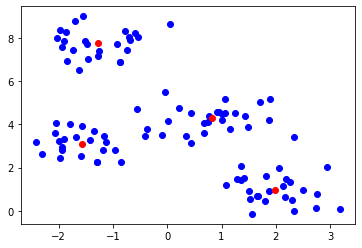

In [53]:
%matplotlib inline

k = 4
centroids = np.array([[-3,3], [-3,8], [2,4], [2,1]], dtype = float)
centroids, clusterAssigned = cluster(X, k, centroids)
draw(X, centroids)

## 문제2) 배정된 클러스터가 맞는지 비교하여 동일한지 확인하세요.

In [44]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
print ("Cluster label: ", kmeans.labels_)
print ("Centroid: ", kmeans.cluster_centers_)
print ("Predictions: ",kmeans.predict([[0, 0], [4, 4]]))

Cluster label:  [3 1 3 3 3 3 0 1 3 1 1 1 1 1 1 2 2 3 0 2 3 1 0 2 3 0 3 3 2 2 2 1 2 2 0 3 1
 2 1 0 3 0 1 0 0 1 2 0 3 3 3 2 0 0 0 1 1 2 2 1 1 2 2 3 2 1 0 0 2 3 1 2 3 1
 3 3 0 0 2 2 2 1 0 3 2 0 2 2 3 3 3 0 3 0 0 1 1 0 1 3]
Centroid:  [[-1.5772186   3.11456071]
 [-1.27208964  7.74944718]
 [ 1.97918933  0.97920012]
 [ 0.83044547  4.27831711]]
Predictions:  [2 3]


### 일반적인 sklearn.kmeans 사용결과 동일한 것을 확인 가능

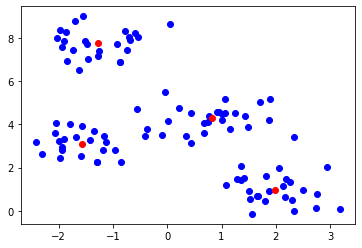

In [28]:
draw(X, kmeans.cluster_centers_)